In [1]:
pip install imbalanced-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Load Data
from google.colab import drive
drive.mount('/content/drive')
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fraudTrain.csv.zip')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fraudTest.csv.zip')

# Prepare Features and Target
# Drop non-numeric columns before scaling , dropping non-numeric datas
X_train = train.drop(['is_fraud', 'trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last', 'street', 'job', 'dob', 'trans_num', 'category'], axis=1)
y_train = train['is_fraud']
X_test = test.drop(['is_fraud', 'trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last', 'street', 'job', 'dob', 'trans_num', 'category'], axis=1)
y_test = test['is_fraud']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Identify categorical and numerical columns
categorical_features = ['gender']
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
numerical_features.remove('Unnamed: 0') # Assuming 'Unnamed: 0' is an index column and not a feature

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

In [5]:
# Create and Train Models using Pipelines
logreg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('classifier', LogisticRegression(max_iter=1000, random_state=0))])

dtree_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', DecisionTreeClassifier(random_state=0))])

rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', RandomForestClassifier(n_estimators=100, random_state=0))])

logreg_pipeline.fit(X_train, y_train)
dtree_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

# Predictions
y_pred_log = logreg_pipeline.predict(X_test)
y_pred_tree = dtree_pipeline.predict(X_test)
y_pred_rf = rf_pipeline.predict(X_test)



In [6]:
# Evaluation
print("=== WITHOUT BALANCING ===")
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

=== WITHOUT BALANCING ===
Logistic Regression Accuracy: 0.9955121203341977
Decision Tree Accuracy: 0.9838209598736052
Random Forest Accuracy: 0.9954185478632186

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.27      0.11      0.16      2145

    accuracy                           1.00    555719
   macro avg       0.63      0.55      0.58    555719
weighted avg       0.99      1.00      0.99    555719



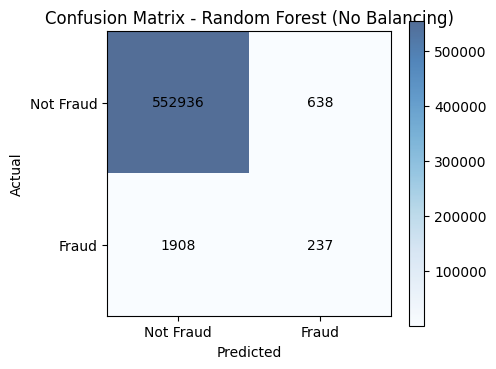

In [7]:
# Visualization
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
plt.imshow(cm, cmap='Blues', alpha=0.7)
plt.title('Confusion Matrix - Random Forest (No Balancing)')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0,1], ['Not Fraud', 'Fraud'])
plt.yticks([0,1], ['Not Fraud', 'Fraud'])
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.tight_layout()
plt.show()

In [8]:
# With Data Balancing (Random OverSampling)
from imblearn.over_sampling import RandomOverSampler

# Load Data
from google.colab import drive
drive.mount('/content/drive')
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fraudTrain.csv.zip')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fraudTest.csv.zip')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Prepare Features and Target, dropping non-numeric datas
X_train = train.drop(['is_fraud', 'trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last', 'street', 'job', 'dob', 'trans_num', 'category', 'gender', 'city', 'state', 'zip'], axis=1)
y_train = train['is_fraud']
X_test = test.drop(['is_fraud', 'trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last', 'street', 'job', 'dob', 'trans_num', 'category', 'gender', 'city', 'state', 'zip'], axis=1)
y_test = test['is_fraud']

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Random OverSampling
ros = RandomOverSampler(random_state=42)
X_balanced, y_balanced = ros.fit_resample(X_train_scaled, y_train)

In [11]:
# Train Models on Balanced Data
logreg_bal = LogisticRegression(max_iter=300, random_state=0)
dtree_bal = DecisionTreeClassifier(random_state=0)
rf_bal = RandomForestClassifier(n_estimators=100, random_state=0)

logreg_bal.fit(X_balanced, y_balanced)
dtree_bal.fit(X_balanced, y_balanced)
rf_bal.fit(X_balanced, y_balanced)

# Predictions
y_pred_log_bal = logreg_bal.predict(X_test_scaled)
y_pred_tree_bal = dtree_bal.predict(X_test_scaled)
y_pred_rf_bal = rf_bal.predict(X_test_scaled)


In [12]:
# Evaluation
print("\n=== WITH RANDOM OVERSAMPLING ===")
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_bal))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree_bal))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_bal))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf_bal))


=== WITH RANDOM OVERSAMPLING ===
Logistic Regression Accuracy: 0.9941787126227464
Decision Tree Accuracy: 0.972149593589566
Random Forest Accuracy: 0.9961401355721147

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


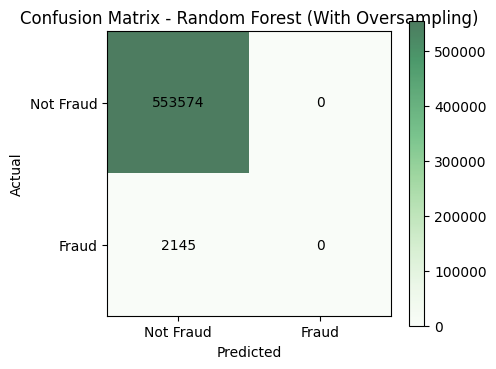

In [13]:
# Visualization
cm_bal = confusion_matrix(y_test, y_pred_rf_bal)
plt.figure(figsize=(5,4))
plt.imshow(cm_bal, cmap='Greens', alpha=0.7)
plt.title('Confusion Matrix - Random Forest (With Oversampling)')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0,1], ['Not Fraud', 'Fraud'])
plt.yticks([0,1], ['Not Fraud', 'Fraud'])
for i in range(cm_bal.shape[0]):
    for j in range(cm_bal.shape[1]):
        plt.text(j, i, cm_bal[i, j], ha='center', va='center', color='black')
plt.tight_layout()
plt.show()